In [147]:
import numpy as np
from sklearn.decomposition import PCA
import os
%matplotlib inline

import matplotlib.pyplot as plt

img_feat_file_name = 'full_orig_im_arr.npy'

cur_feat = img_feat_file_name[5:-4]

img_feat_load_dir = '/home/amanda/Documents/vgg_model/e_7800_feat/'
img_feat = np.load(img_feat_load_dir + img_feat_file_name)

x_train = img_feat[train_ind, :]
x_test = img_feat[test_ind, :]
y_train = train_df['success'].values
y_test = test_df['success'].values

In [149]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

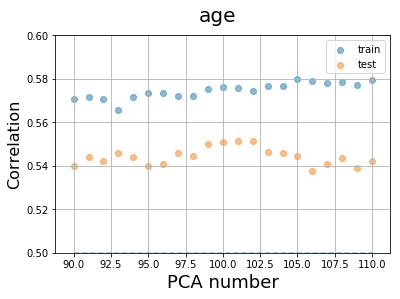

In [291]:
# visualize the performance change curves.
fig = plt.figure()
fig.suptitle(cur_feat, fontsize=20)
plt.scatter(performance_df['pca number'], performance_df['train acc'], label='train', alpha=0.5)
plt.scatter(performance_df['pca number'], performance_df['test acc'], label='test', alpha=0.5)
plt.xlabel('PCA number', fontsize=18)
plt.ylabel('Correlation', fontsize=16)
plt.ylim(0.5, 0.6)
plt.plot([x_start, x_end], [0.5, 0.5], linestyle='--', alpha=0.5)
plt.grid()
plt.legend()
fig.savefig(exp_dir + cur_feat + '_' + 'male_add_feat' + '.jpg')

In [1]:
import pandas as pd
df_name = './tmp_data/merged_api_impression.csv'
df = pd.read_csv(df_name)
my_map = {'female': 0, 'male': 1}
df = df.applymap(lambda s: my_map.get(s) if s in my_map else s)
max_fund = df['total fund'].max()
df.loc[df['IPO'] == 1, 'total fund'] = max_fund + 0.1

In [2]:
df_with_fund = df[df['total fund'] != 0]

In [3]:
x = df_with_fund[['age', 'gender', 'trustworthy', 'intelligent', 'aggressive', 'attractive', 'responsible', 'sociable']].values

In [13]:
y = df_with_fund['total fund'].values

In [17]:
feat_lst = ['age', 'gender', 'trustworthy', 'intelligent', 'aggressive', 'attractive','responsible', 'sociable']

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
%matplotlib inline

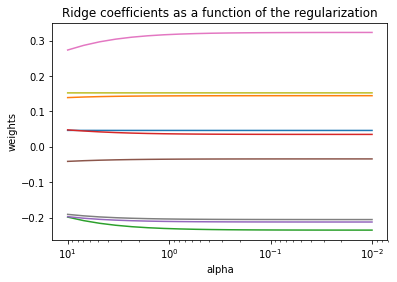

In [21]:
# Compute paths

n_alphas = 20
alphas = np.logspace(-2, 1, n_alphas)

coefs = []
scores = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    score = ridge.score(x, y)
    scores.append(score)
# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [22]:
for i, j in zip(coefs[0], feat_lst):
    print j, i

age 0.046156604807064155
gender 0.14439084076499906
trustworthy -0.23558052059202697
intelligent 0.034961954613198926
aggressive -0.2126820069921311
attractive -0.034307878502845
responsible 0.3231445399848073
sociable -0.20578112121102388


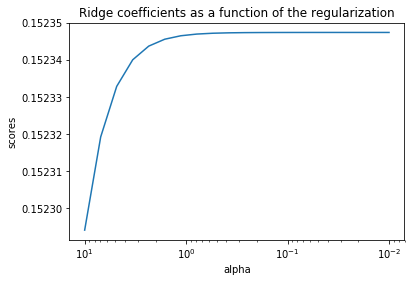

In [26]:
ax = plt.gca()

ax.plot(alphas, scores)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('scores')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [27]:
lr = linear_model.LinearRegression()
lr.fit(x, y)
score = ridge.score(x, y)
print score

0.15229416320946743


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [31]:
feat_lst = ['age', 'gender', 'trustworthy', 'intelligent', 'aggressive', 'attractive','responsible', 'sociable']
x = df_with_fund[feat_lst].values
y = df_with_fund['total fund'].values
lr = linear_model.LinearRegression()
lr.fit(x, y)
score = lr.score(x, y)
print score

0.15234735373665942


In [30]:
feat_lst = ['gender', 'trustworthy', 'intelligent', 'aggressive', 'attractive','responsible', 'sociable']
x = df_with_fund[feat_lst].values
y = df_with_fund['total fund'].values
lr = linear_model.LinearRegression()
lr.fit(x, y)
score = lr.score(x, y)
print score

0.0614600130220565


In [33]:
feat_lst = ['age']
x = df_with_fund[feat_lst].values
y = df_with_fund['total fund'].values
lr = linear_model.LinearRegression()
lr.fit(x, y)
score = lr.score(x, y)
print score

0.14310032065962952


In [34]:
feat_lst = ['trustworthy', 'intelligent', 'aggressive', 'attractive','responsible', 'sociable']
x = df_with_fund[feat_lst].values
y = df_with_fund['total fund'].values
lr = linear_model.LinearRegression()
lr.fit(x, y)
score = lr.score(x, y)
print score

0.060474183909802526


In [36]:
feat_lst = ['trustworthy']
x = df_with_fund[feat_lst].values
y = df_with_fund['total fund'].values
lr = linear_model.LinearRegression()
lr.fit(x, y)
score = lr.score(x, y)
print score

0.003397570371764913


In [37]:
len(df_with_fund)

3097